# Abstract

For this project, I chose to perform data analysis on a Real Estate Valuation data set. The motivation in performing linear regression on this data is to be able to predict the house price of unit area based on other features such as the house age, distance to MRT station, number of convenience stores, and location.  Additionally, when we have a predicted price of unit area, we can see how the value compares to other homes with similar other features.  So, if the actual price per unit area is higher than the prediction, this could potentially mean that the price per unit is too high and a real estate agent may advise a buyer to look at cheaper per unit homes that have similar features.  Doing so will make buyers happier as they pay less for the similar houses giving them higher value.  This leads to more buyers coming to this real estate agent and better business for them.

To perform this analysis, I will use the Real estate valuation data set from the UCI Machine Learning repository. I downloaded this data as a CSV file and began the cleaning of it from there. The data contains 7 columns and 414 entires.  The columns consist of the following: the transaction date, house age, distance to the nearest MRT station (in meters), number of convenience stores in the living circle on foot, geographic coordinate latitude, geographic coordinate longitude, and house price of unit area.  All of these columns are of type float, except for the number of convenience stores which is an integer.  A potential fall back of the data is that 414 entires is not a ton of data.  Also, after removing outliers the number of entries actually used becomes 338.  It is more of a challenge to represent accurate predictions for the outliers, but we leave those to be determined as that is a rare case.

Techniques: I use pandas, seaborn, sklearn, statsmodel.api, and numpy to import, clean, and build a linear regression model on the data after importing from excel into a dataframe. The first step after reading the CSV file is to clean the data in preparation for analysis. Visualizations are created to help understand the results better.

Cleaning the data: The following are the steps, techniques and assumptions I used to clean the data:
* Read the CSV and take a look at the data using the pandas info() and head() functions.
* The first column, No, is just an index which is not helpful so I drop it.
* Rename the columns to replace all the spaces with underscores.
* I used box and whisker plots to determine which columns needed outliers removed.  If the plot had points outside the IQR, I knew there were outliers to be removed from that column.  I calculate outliers to be outside the range of Q1 - 1.5 * IQR, and Q3 + 1.5 * IQR and return a dataframe that has them filtered out.
* When performing linear regression, one thing I found is the model performed better doing the prediction of the log of the house price of unit area than the actual value, so part of the cleaning is creating an additional column, log_house_price_of_unit_area, for which we use the numpy log function to create its values as the log of the house_price_of_unit_area column.
* Lastly, I write the cleaned pandas dataframe to a csv file to be loaded from the linear regression workbook. For the code of this cleaning, please see the load_and_clean workbook.

Now, onto the linear regression model of the data:

In [1]:
#imports
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt # for visualizations
import seaborn as sns # for visualizations
from sklearn.linear_model import LinearRegression #linear regression tool
import statsmodels.api as sm #linear regression tool

In [2]:
#read in the csv file
house_value_df = pd.read_csv("../data/real_estate_value_cleaned.csv", encoding= 'utf-8')

In [31]:
#get the train test split
#I choose to go with a test_size of 0.2 because with 338 entries, it is a good balance to have enough
#testing data, but at the same time not be missing too much of the dataset for training
X_train, X_test = train_test_split(house_value_df, test_size = 0.2) # splits the data into two parts with 1:4 ratio

In [38]:
#set the training and testing data
X = X_train[['transaction_date','house_age', 'distance_to_the_nearest_MRT_station', 'number_of_convenience_stores', 'latitude', 'longitude']]
y = X_train.log_house_price_of_unit_area
X = sm.add_constant(X) #add the constant to the model
mod = sm.OLS(y, X, hasconst= True) #create the ordinary least squares model
res = mod.fit() #fit the model
print(res.summary()) #summarize the model

                                 OLS Regression Results                                 
Dep. Variable:     log_house_price_of_unit_area   R-squared:                       0.719
Model:                                      OLS   Adj. R-squared:                  0.712
Method:                           Least Squares   F-statistic:                     112.0
Date:                          Mon, 21 Sep 2020   Prob (F-statistic):           1.70e-69
Time:                                  19:08:56   Log-Likelihood:                 106.70
No. Observations:                           270   AIC:                            -199.4
Df Residuals:                               263   BIC:                            -174.2
Df Model:                                     6                                         
Covariance Type:                      nonrobust                                         
                                          coef    std err          t      P>|t|      [0.025      0.975]
------

The results of the train and test set may vary each run as the selection between the two is random.  For the results above from the model summary there are a few important takeaways.  First, we see that the R-squared is 0.719 and adjusted R-squared is 0.712 (based on the number of features involved in the model).  We will use the adjusted R-squared and interpret it to see that approximately 71.2% of the variation in the house price of unit area can be explained by the model.  To me, this seems like a pretty decent model and about as good as we can get it.  The features explaining the variance in house price of unit area are the transaction_date, house_age, distance_to_the_nearest_MRT_station, number_of_convenience_stores, latitude, and longitude.  This leads us to our next takeaways.  

Looking at the next section of the results, we see that if we were to convert it to an equation, it would look like this: 

predicted log_house_price_of_unit_area = -587.2630 + 0.1376 * transaction_date - 0.0083 * house_age - 0.0004 * distance_to_the_nearest_MRT_station + 0.0114 * number_of_convenience_stores + 8.5472 * latitude + 0.8298 * longitude

These coefficients are determined by minimizing the sum of squares of the residuals (actual - predicted).  Taking this analysis a step further, we see that all features except for longitude are proven to be statistically significant when predicting the house price of unit area.  We know this by looking at the P values, which when less than .025, we can say are significantly different enough from 0 to say for sure it has an impact (coefficient of 0 would mean house price of unit area would be indifferent no matter the value of that feature).  Another way to look at it is by looking at the [0.025      0.975] confidence interval.  We can say that we are 95% confident that the true coefficient is in that range, and if that range does not include 0, it is statistically significant enough to have an impact on the prediction.

Interestingly, longitude is the only feature that is not significant.  So, I tried removing it from the model.  When removed, the R-squared drops to 0.718, and the adjusted R-squared increases to 0.713 since there is one less feature.  Due to the fact that the change in effectiveness of the model is so small, I choose to leave the longitude in the model because it helps with the interpretation - both the latitude and longitude make up location and it does not make a whole lot of sense to include one and not the other.

In [33]:
#subset the 6 column features for the test inputs
Xtest = X_test[['transaction_date','house_age', 'distance_to_the_nearest_MRT_station', 'number_of_convenience_stores', 'latitude', 'longitude']]
ytest = X_test.log_house_price_of_unit_area #subset the log house price as the y dependent variable
Xtest = sm.add_constant(Xtest) #set Xtest to be the constant as inputs

res.predict(Xtest); #predict using the Xtest inputs

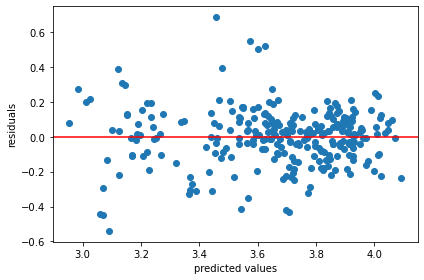

In [34]:
residuals = res.resid #get the residuals, use as the y axis

y_pred = res.predict(X) #use the predicted y value as the x axis
plt.scatter(y_pred, residuals)
plt.axhline(y=0, color = 'red', label = '0')

plt.xlabel('predicted values')
plt.ylabel('residuals')
plt.tight_layout()

Analyzing the residual plot above, we can tell that we have generated a good model since there are no patterns in the residuals.  They are generally random.  The reason I went with the log of the house price of unit area is because when originally looking at the residual plot prior to taking the log, there was a non-constant variance of error terms - as the predicted value increased, the variance also seemed to increase.

# Challenges
One challenge was deciding on the test_size to use.  I tried various different sizes, and determined that using the 20% seemed to generally result in the best model.  Another challenge was finding how exactly to get rid of the non-constant variance of error terms in the residuals.  The best solution seemed to be tunring the predictor into a the log of the house price of unit area.

# Results and Conclusions
* The R-squared is approximately 0.719 and adjusted R-squared is 0.712 (based on the number of features involved in the model). We will use the adjusted R-squared and interpret it to see that approximately 71.2% of the variation in the house price of unit area can be explained by the model. To me, this seems like a pretty decent model and about as good as we can get it.
* Looking at the next section of the results, we see that if we were to convert it to an equation, it would look like this:
    * predicted log_house_price_of_unit_area = -587.2630 + 0.1376 * transaction_date - 0.0083 * house_age - 0.0004 * distance_to_the_nearest_MRT_station + 0.0114 * number_of_convenience_stores + 8.5472 * latitude + 0.8298 * longitude
* Longitude is the only feature that is not significant. So, I tried removing it from the model. When removed, the R-squared drops to 0.718, and the adjusted R-squared increases to 0.713 since there is one less feature. Due to the fact that the change in effectiveness of the model is so small, I choose to leave the longitude in the model because it helps with the interpretation - both the latitude and longitude make up location and it does not make a whole lot of sense to include one and not the other.
* Analyzing the residual plot, we can tell that we have generated a good model since there are no patterns in the residuals. They are generally random. The reason I went with the log of the house price of unit area is because when originally looking at the residual plot prior to taking the log, there was a non-constant variance of error terms - as the predicted value increased, the variance also seemed to increase.